In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math

In [2]:
#params
x0 = 5
a0 = 1
r0 = 0.5
k = 15
w = 6.25
b = 1
I = 2.375
tr = 1
ta = 100
#eta(t) #noise vector
Tmax = 5000;
dt = 0.01;
t = np.linspace(0,Tmax, int((Tmax)/dt)+1);
r = np.zeros(len(t))
a = np.zeros(len(t))
r[0] = r0
a[0] = a0

def rinf(x):
  return 1/(1 + math.exp(-1*(x - x0)))

def ainf(r):
  return 1/(1+math.exp(-k*(r-r0)))

In [3]:
#second order runge kutta
D = 0
eta = np.random.randn(len(t));

for j in range(len(t)-1):
  dr1 = (-r[j] + rinf(w*r[j] - b*a[j] + I + math.sqrt(2*D*dt)*eta[j]))/tr
  da1 = (-a[j] + ainf(r[j]))/ta
  ar = r[j] + dr1*dt
  #ar = ar+math.sqrt(2*D*dt)*eta[j];
  aa = a[j] + da1*dt
  #aa = aa+math.sqrt(2*D*dt)*eta[j];
  dr2 = (-ar + rinf(w*ar - b*aa + I + math.sqrt(2*D*dt)*eta[j]))/tr
  da2 = (-aa + ainf(ar))/ta
  r[j+1] = r[j] + (dr1 + dr2)*dt/2
  #r[j+1] = r[j+1] + math.sqrt(2*D*dt)*eta[j];
  a[j+1] = a[j] + (da1 + da2)*dt/2
  #a[j+1] = a[j+1] + math.sqrt(2*D*dt)*eta[j];

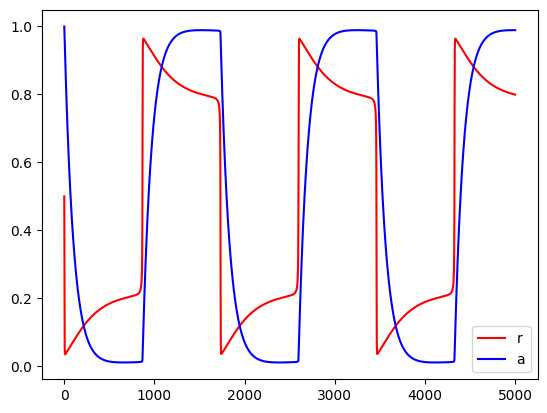

In [4]:
f = plt.figure()
plt.plot(t, r, "-r")
plt.plot(t, a, '-b')
plt.legend(["r", "a"])

In [5]:
#nullcline calculations
rnull_range = np.arange(0, 2, .005)
anull_range = np.arange(0, 2, .005)
rnullcline = np.zeros(len(rnull_range))
anullcline = np.zeros(len(anull_range))

rnullcline_analytical = np.zeros(len(rnull_range))
anullcline_analytical = np.zeros(len(anull_range))
count = 0
j = 0
jnull = 0
anull = 0

for i in rnull_range:
  mindr = abs(-i + rinf(w*i - b*j + I))
  minda = abs( -j + ainf(i))
  for j in anull_range:
    dr = (-i + rinf(w*i - b*j + I))
    da = -j + ainf(i)
    if(abs(dr) < mindr):

      mindr = abs(dr)
      rnull = j
    if(abs(da) < minda):
      minda = abs(da)
      anull = j

  rnullcline[count] = rnull
  anullcline[count] =  anull
  rnullcline_analytical[count] = (w*i + np.log((1-i)/i) + I - x0)/b
  anullcline_analytical[count] = ainf(i)

  count += 1

<ipython-input-5-32e879588887>:30: RuntimeWarning: divide by zero encountered in double_scalars
  rnullcline_analytical[count] = (w*i + np.log((1-i)/i) + I - x0)/b
<ipython-input-5-32e879588887>:30: RuntimeWarning: divide by zero encountered in log
  rnullcline_analytical[count] = (w*i + np.log((1-i)/i) + I - x0)/b
<ipython-input-5-32e879588887>:30: RuntimeWarning: invalid value encountered in log
  rnullcline_analytical[count] = (w*i + np.log((1-i)/i) + I - x0)/b


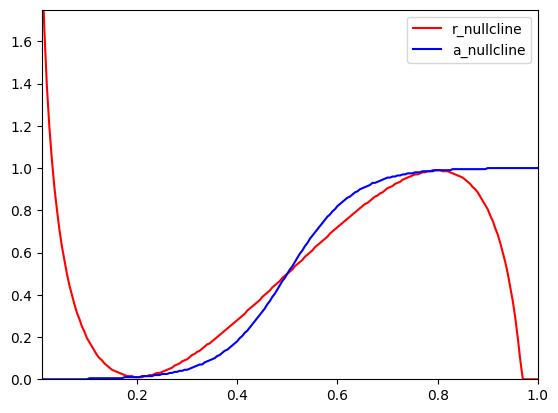

In [6]:
#implicit
f = plt.figure()
plt.plot(rnull_range, rnullcline, "-r")
plt.plot(anull_range, anullcline, "-b")
plt.xlim([0.01, 1])
plt.ylim([0,1.75])
plt.legend(["r_nullcline", "a_nullcline"])